### LIBRARIES

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DATASET IMPORT

In [192]:
data = pd.read_csv('train.csv')

### DATASET EXPLORATION  

Below is a column description for some of the columns in the dataset (as provided by Kaggle):

+ Survived: 0 = No, 1 = Yes
+ Pclass: Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower), which is a proxy for socio-economic status (SES).
+ Age: Age in years. Age is fractional if less than 1. If the age is estimated, it's in the form of xx.5.
+ SibSp: # of siblings/spouses aboard the Titanic (Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored)).
+ Parch: # of parents/children aboard the Titanic (Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Some children travelled only with a nanny, therefore parch=0 for them).
+ Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [193]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [194]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### Information about the dataset:  

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Number of NaN's in the “Age” and “Embarked” columns:

The “Cabin” column is not checked for NaN's because this column has only 204 records and even if this data could affect survival rate of the passengers it’s completely useless with so many missing records.  

In [196]:
print('Number of NaN in the "Age" column:', data.Age.isnull().sum())
print('Number of NaN in the "Embarked" column:', data.Embarked.isnull().sum())

Number of NaN in the "Age" column: 177
Number of NaN in the "Embarked" column: 2


#### Duplicates:

In [197]:
data.drop_duplicates().shape[0]

891

### DATA CLEANING 

***It looks like the following columns are irrelevant to a passenger survival: PassengerId, Name, Ticket. I’m dropping these columns as well as the Cabin column, which might be relevant, but because of the large number of NaN's in it, it’s useless.***

In [198]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


***Substituting 177 NaN's in the “Age” column with an estimated average age because it’s better to keep these records instead of dropping them.***

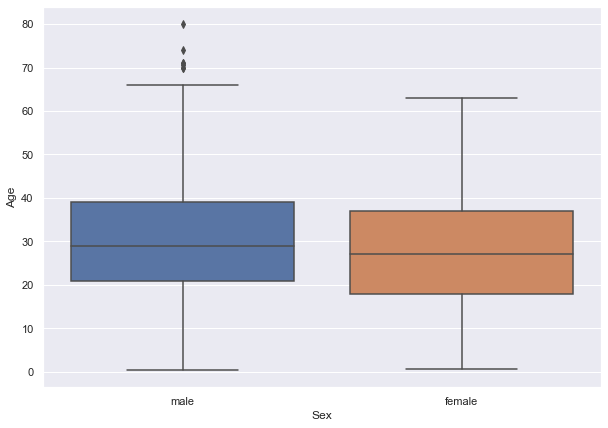

In [199]:
plt.figure(figsize = (10, 7))
sns.set(style="darkgrid")
sns.boxplot(x = 'Sex', y = 'Age', data = data, palette = 'deep');

***According to the above chart, the average male age is around 29 years old and the average female age is around 26 years old.***

In [200]:
def Add_Age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 26
    else:
        return age

In [201]:
data['Age'] = data[['Age', 'Sex']].apply(Add_Age, axis = 1)

In [202]:
print('Number of NaN in the "Age" column:', data.Age.isnull().sum())

Number of NaN in the "Age" column: 0


***The “Embarked” column has 2 NaN's. Filling it with values using backfill method, which uses next valid observation to fill a gap.***

In [203]:
data['Embarked'].fillna(method = 'bfill', axis = 0, inplace=True)

In [204]:
print('Number of NaN in the "Embarked" column:', data.Embarked.isnull().sum())

Number of NaN in the "Embarked" column: 0


***Encoding male/female categories in the “Sex” column and removing dummy variable trap.***

In [205]:
female_dummy = pd.get_dummies(data['Sex']).drop('male', axis = 1)
data.drop('Sex', axis = 1, inplace = True)
data = pd.concat([data, female_dummy], axis = 1)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0
887,1,1,19.0,0,0,30.0000,S,1
888,0,3,26.0,1,2,23.4500,S,1
889,1,1,26.0,0,0,30.0000,C,0


***Assigning X and y variables.*** 

In [206]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [207]:
print(X[890])

[3 32.0 0 0 7.75 'Q' 0]


In [208]:
print(y[890])

0


***Encoding “Embarked” categories inside X variable.***

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [210]:
X[890]

array([0.0, 1.0, 0.0, 3, 32.0, 0, 0, 7.75, 0], dtype=object)

***Splitting X and y into train and test sets.***

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

In [212]:
X_train.shape[0]

846

In [213]:
X_test.shape[0]

45

In [214]:
y_train.shape[0]

846

In [215]:
y_test.shape[0]

45

***Feature scaling.***

In [216]:
data.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [217]:
data.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [218]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 4:8] = sc.fit_transform(X_train[:, 4:8])
X_test[:, 4:8] = sc.transform(X_test[:, 4:8])

In [219]:
X_train[:2, :]

array([[0.0, 0.0, 1.0, 3, -0.23308875330656073, -0.4763593617900814,
        -0.4721140008788145, -0.48267192319146884, 0],
       [0.0, 0.0, 1.0, 3, -0.23308875330656073, -0.4763593617900814,
        -0.4721140008788145, -0.48267192319146884, 0]], dtype=object)

In [220]:
X_test[:2, :]

array([[1.0, 0.0, 0.0, 3, -0.23308875330656073, -0.4763593617900814,
        -0.4721140008788145, -0.35105588214437705, 0],
       [0.0, 0.0, 1.0, 3, -0.23308875330656073, -0.4763593617900814,
        -0.4721140008788145, -0.48960721111437694, 0]], dtype=object)

### K-SVM MODEL TRAINING

In [221]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### TRAINING & TESTING DATA SCORES

In [222]:
print(f"Training Data Score: {round(classifier.score(X_train, y_train), 2)}")
print(f"Testing Data Score: {round(classifier.score(X_test, y_test), 2)}")

Training Data Score: 0.83
Testing Data Score: 0.84


### SVM MODEL TESTING

In [223]:
y_predict = classifier.predict(X_test)

In [224]:
y_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [225]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1])

### CONFUSION MATRIX 


Confusion Matrix results for K-SVM Model are: 

[[23  2]
 [ 5 15]]

Accuracy: 0.84




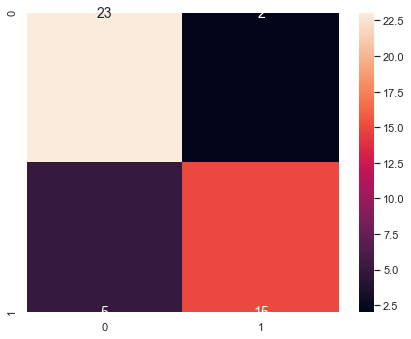

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f'\nConfusion Matrix results for K-SVM Model are: \n\n{cm}\n\nAccuracy: {round(accuracy, 2)}\n\n')
f, ax=plt.subplots(figsize=(7, 5.5))
sns.heatmap(cm, annot = True, fmt = 'd', annot_kws = {'size':14});

### CLASSIFICATION REPORT

In [227]:
from sklearn.metrics import classification_report
print(f'\n Classification Report for K-SVM Model \n\n\n{classification_report(y_test, y_predict)}')


 Classification Report for K-SVM Model 


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.88      0.75      0.81        20

    accuracy                           0.84        45
   macro avg       0.85      0.83      0.84        45
weighted avg       0.85      0.84      0.84        45



### MEAN SQUARED ERROR (MSE)

In [228]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
print(f"MSE: {round(MSE, 2)}")

MSE: 0.16
